# HW4 Artificial Neural Networks

– Part 1: Describe Batch Normalization

 Batch normalization is a method use to rectify covariate shift within a neural netwrok layer. Through the use of rescaling and recentering, batch normalization noramalize the inputs of our layers. Covariate shift occurs when a change in distribution in a layer affects the learning speed of  our network. 

-- Part 2: Load MNIST Fashion Data Set from keras
https://keras.io/api/datasets/fashion mnist/
Create several neural network models investigating the effect of hyperparameters and
techniques we studied on the model performance (number of layers, number of neurons in
hidden layers, optimizers, batch size and learning rate in the gradient descent optimizers,
L1 and L2 regularization, dropout, batch normalization, weight and bias initialization,
etc.) using the information provided at
https://keras.io/api/

In [26]:
# pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import models, datasets, layers, optimizers



(60000, 28, 28)
(10000, 28, 28)
9


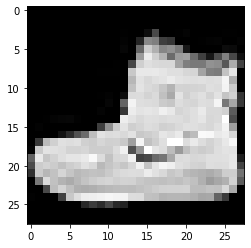

In [28]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(X_train_full.shape)
print(X_test.shape)

X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

plt.imshow(X_train[0], cmap="gray")
print(y_train[0]);

In [29]:
ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [30]:
ann1.fit(X_train, y_train, epochs=5)
info = ann1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6233 - accuracy: 0.7909
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4705 - accuracy: 0.8400
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4411 - accuracy: 0.8489
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4249 - accuracy: 0.8552
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4161 - accuracy: 0.8563
Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4100 - accuracy: 0.8584 - val_loss: 0.4217 - val_accuracy: 0.8536
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4037 - accuracy: 0.8611 - val_loss: 0.4318 - val_accuracy: 0.8495
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3987 - accuracy: 0.8610 - val_loss: 0.4339 - val_accuracy: 0.8487
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/

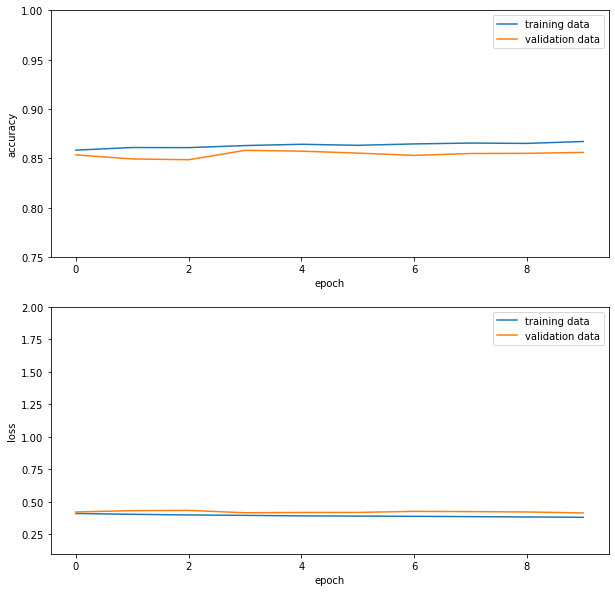

In [39]:
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.75,1])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.1,2])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [5]:
ann1.evaluate(X_test, y_test)
y_pred = ann1.predict(X_test)
y_pred[0]

313/313 [==============================] - 1s 2ms/step - loss: 0.4424 - accuracy: 0.8474


array([1.0998728e-07, 2.1357591e-09, 5.6064046e-06, 3.7158627e-06,
       2.6802054e-06, 4.5016970e-02, 2.0137000e-05, 3.9966982e-02,
       3.2818075e-03, 9.1170198e-01], dtype=float32)

In [40]:
ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(130, activation='selu'),
    layers.Dense(10, activation='elu')
])

ann2.compile(optimizer='sgd', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 4.8523 - accuracy: 0.1504
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.3974 - accuracy: 0.1540
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.2899 - accuracy: 0.1863
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.5827 - accuracy: 0.1663
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.8167 - accuracy: 0.0999


In [7]:
ann2.fit(X_train, y_train, epochs=5)
info = ann2.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
ann2.evaluate(X_test, y_test)
y_pred = ann2.predict(X_test)
y_pred[0]

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2873 - accuracy: 0.0995
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2175 - accuracy: 0.0995
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1969 - accuracy: 0.0995
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2335 - accuracy: 0.0995
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1931 - accuracy: 0.0995
Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1530 - accuracy: 0.0995 - val_loss: 2.1766 - val_accuracy: 0.1023
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1622 - accuracy: 0.0995 - val_loss: 2.1632 - val_accuracy: 0.1023
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1610 - accuracy: 0.0995 - val_loss: 2.1248 - val_accuracy: 0.1023
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step

array([39.843914 , -1.       , 14.728111 ,  6.248768 , -0.9999515,
        9.944932 ,  9.471553 , 14.02437  ,  3.354875 , 12.885222 ],
      dtype=float32)

In [41]:
ann2.summary()
info = ann2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 130)               102050    
                                                                 
 dense_19 (Dense)            (None, 10)                1310      
                                                                 
Total params: 103,360
Trainable params: 103,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 3.8187 - accuracy: 0.0999 - val_loss: 3.7607 - val_accuracy: 0.1009
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 3.8187 - accuracy: 0.0999 - val_loss: 3.7607 - val_accuracy: 0.1009
Epoch 3/10
1563/1563 [=

In [9]:
from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

ann3.compile(optimizer='adamax',
             loss='Poisson',
             metrics=['accuracy'])

ann3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 10.9376 - accuracy: 0.0995
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 10.5131 - accuracy: 0.1034
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 10.4767 - accuracy: 0.1022
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 10.4761 - accuracy: 0.0986
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 10.4761 - accuracy: 0.0981


In [10]:
ann3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
______________________________________________

In [16]:
from keras.layers import Dropout, BatchNormalization

ann4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='elu'),
    layers.BatchNormalization(),
    layers.GaussianDropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

ann4.compile(optimizer='adamax',
             loss='Poisson',
             metrics=['accuracy'])

ann4.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 10.9685 - accuracy: 0.0943
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 10.5218 - accuracy: 0.0943
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 10.4774 - accuracy: 0.0973
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 10.4761 - accuracy: 0.0962
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 10.4761 - accuracy: 0.0963


In [ ]:
ann4.summary()
#info = ann4.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))